## PCA (Part 2)

CPSC 340: Machine Learning and Data Mining

The University of British Columbia

2017 Winter Term 2

Mike Gelbart

In [3]:
import numpy as np
import pickle
import os.path
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

We have 2414 faces, each 32x32 pixels.


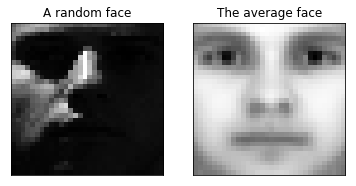

In [4]:
with open(os.path.join("img","faces.pkl"), "rb") as f:
    faces = pickle.load(f)

# helper functions
def display_face(f, cmap='Greys_r', vmin=None, vmax=None):
    plt.imshow(np.reshape(f, (32,32)).T, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.tick_params(axis='both', which='both', bottom='off', left='off', labelbottom='off', labelleft='off')
    plt.grid(False)    
def reconstruct(model, X):
    Z = model.transform(X)
    try:
        return model.inverse_transform(Z)
    except AttributeError: # no inverse_transform function
        W = model.components_
        return Z@W
    # Note on the above: you can't just do Z@W for PCA because of the centring of the data, 
    # which needs to be undone for the reconstruction


plt.figure()
plt.subplot(1,2,1)
display_face(random.choice(faces))
plt.title("A random face")
plt.subplot(1,2,2)
display_face(np.mean(faces,axis=0))
plt.title("The average face")

N,D = faces.shape
print("We have %d faces, each 32x32 pixels." % N)

## Testing it out with scikit-learn's PCA

In [7]:
pca = PCA()
pca.fit(faces)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
cumulative_var_expl = np.cumsum(pca.explained_variance_ratio_)
for i in range(20):
    print("With %2d components, variance explained = %.0f%%" % (i+1, cumulative_var_expl[i]*100))

With  1 components, variance explained = 36%
With  2 components, variance explained = 71%
With  3 components, variance explained = 76%
With  4 components, variance explained = 79%
With  5 components, variance explained = 80%
With  6 components, variance explained = 82%
With  7 components, variance explained = 83%
With  8 components, variance explained = 84%
With  9 components, variance explained = 85%
With 10 components, variance explained = 85%
With 11 components, variance explained = 86%
With 12 components, variance explained = 86%
With 13 components, variance explained = 87%
With 14 components, variance explained = 87%
With 15 components, variance explained = 88%
With 16 components, variance explained = 88%
With 17 components, variance explained = 88%
With 18 components, variance explained = 89%
With 19 components, variance explained = 89%
With 20 components, variance explained = 89%


## Our own implementation

In [44]:
pixel_means = np.mean(faces,axis=0)
faces_centered = faces - pixel_means
u,s,W = np.linalg.svd(faces_centered, full_matrices=False)
Z = u@np.diag(s)

In [45]:
pixel_means.shape

(1024,)

In [46]:
Z.shape

(2414, 1024)

In [47]:
W.shape

(1024, 1024)

In [48]:
for i in range(1,20):
    reconstr = Z[:,:i]@W[:i]
    var_expl = 1-np.sum((reconstr-faces_centered)**2)/np.sum(faces_centered**2)
    print("With %2d components, variance explained = %.0f%%" % (i, var_expl*100))

With  1 components, variance explained = 36%
With  2 components, variance explained = 71%
With  3 components, variance explained = 76%
With  4 components, variance explained = 79%
With  5 components, variance explained = 80%
With  6 components, variance explained = 82%
With  7 components, variance explained = 83%
With  8 components, variance explained = 84%
With  9 components, variance explained = 85%
With 10 components, variance explained = 85%
With 11 components, variance explained = 86%
With 12 components, variance explained = 86%
With 13 components, variance explained = 87%
With 14 components, variance explained = 87%
With 15 components, variance explained = 88%
With 16 components, variance explained = 88%
With 17 components, variance explained = 88%
With 18 components, variance explained = 89%
With 19 components, variance explained = 89%
